# Principal Component Analysis (PCA)
### What is it, and what does it have to do with this week's project?

---

#### Let's start with some familiar code:

In [1]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

#### And let's write a function that takes in numpy arrays of images and renders/plots the first 40 of them:

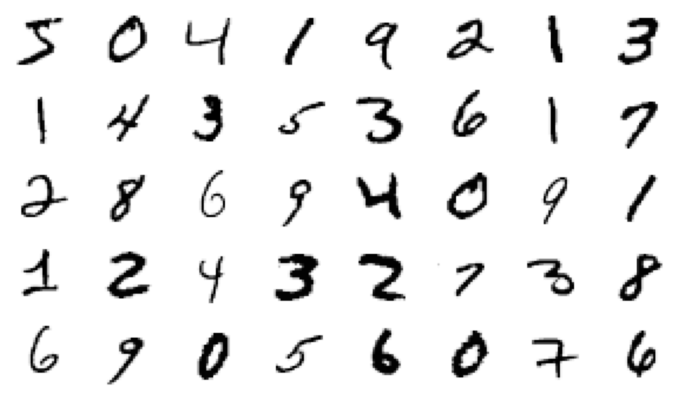

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

def draw_array(x):
    plt.figure(figsize=(12,7))
    for i in range(40):
        plt.subplot(5, 8, i+1)
        plt.imshow(x[i], cmap=plt.cm.Greys)
        plt.axis('off')

draw_array(xtrain)
        



### 1. Need to reshape the data so that it can be properly handled in sklearn

In [3]:
xtrain = xtrain.reshape((60000, 28*28))
xtrain.shape

(60000, 784)

### 2. Split training data even further (to speed up the calculation)

In [4]:
xsmall = xtrain[:1000]
ysmall = ytrain[:1000]

In [5]:
xsmall.shape, ysmall.shape

((1000, 784), (1000,))

### 3. Initialize PCA from Scikit-Learn and fit on X data
- By how many components would we like to decompose our data?
- Caveat: Data should be standard scaled first!

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
xsmall = scaler.fit_transform(xsmall)

In [8]:
m = PCA(n_components = 40)
m.fit(xsmall)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

---

- Notice that each of the components gives us 784 coefficients:

In [9]:
m.components_.shape 

(40, 784)

---

- And we can see the percentage of the over variation in the data that each principal contributes.

In [10]:
m.explained_variance_ratio_

array([0.06494624, 0.05482451, 0.04566391, 0.03486269, 0.03193317,
       0.02691876, 0.02403876, 0.02224378, 0.01966827, 0.01876841,
       0.01641957, 0.01600129, 0.01446706, 0.01422404, 0.01383964,
       0.01315772, 0.01272582, 0.01226066, 0.01145425, 0.01115614,
       0.01057779, 0.01033657, 0.00990016, 0.0096202 , 0.00937171,
       0.00879486, 0.00849947, 0.0081808 , 0.00788952, 0.0077942 ,
       0.00749816, 0.00727372, 0.00719153, 0.00704431, 0.00675354,
       0.00665938, 0.00645041, 0.00629173, 0.00622246, 0.00588707])

### 4. Use the trained PCA model to transform the data to a lower number of features.

In [11]:
xt = m.transform(xtrain) #transform the training data
xt.shape #transformed to 50 features instead of the original 784

(60000, 40)

---

### 5. Use the inverse_transform() method to expand our reduced data back into its original shape.

In [12]:
xback = m.inverse_transform(xt)
print(xback.shape)
xback = xback.reshape((60000, 28, 28))

(60000, 784)


### 6. Visualize what our data looks after it has been reduced to N features.

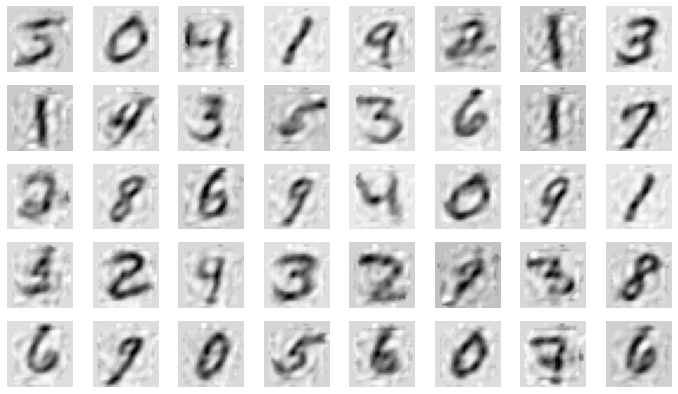

In [13]:
draw_array(xback)

---

### 7. Can we actually see what the components look like, as well?

In [14]:
m.components_.shape

(40, 784)

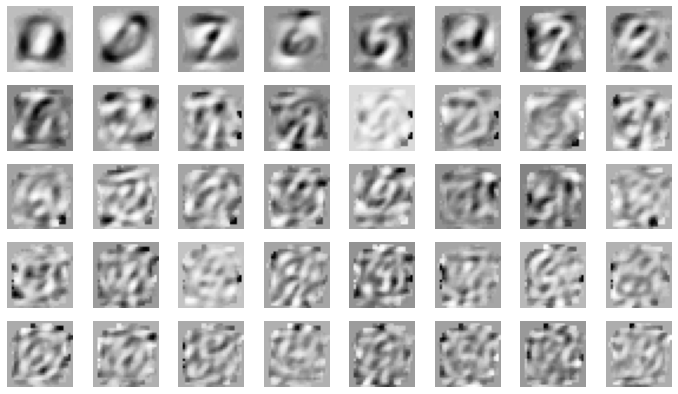

In [15]:
comps = m.components_.reshape((40, 28, 28)) #convert back to original format
draw_array(comps)

### 8. How can this be applied in practice (e.g. on a final project)?


In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xt[:1000], ytrain[:1000])
print(f'Model Score: {logreg.score(xt[:1000], ytrain[:1000])}')

Model Score: 0.978


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


---

### 9. Other interesting analysis:
- Examine the false positives using a confusion matrix.

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
ypred = logreg.predict(xt[:1000])
conf = confusion_matrix(ypred, ysmall)
conf 

array([[ 97,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 114,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   1,  97,   1,   0,   0,   0,   1,   0,   0],
       [  0,   0,   1,  89,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 104,   1,   0,   0,   0,   0],
       [  0,   1,   0,   2,   0,  89,   0,   0,   2,   1],
       [  0,   0,   0,   0,   0,   0,  93,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 116,   0,   1],
       [  0,   0,   0,   1,   0,   2,   0,   0,  81,   0],
       [  0,   0,   1,   0,   1,   0,   0,   0,   3,  98]])

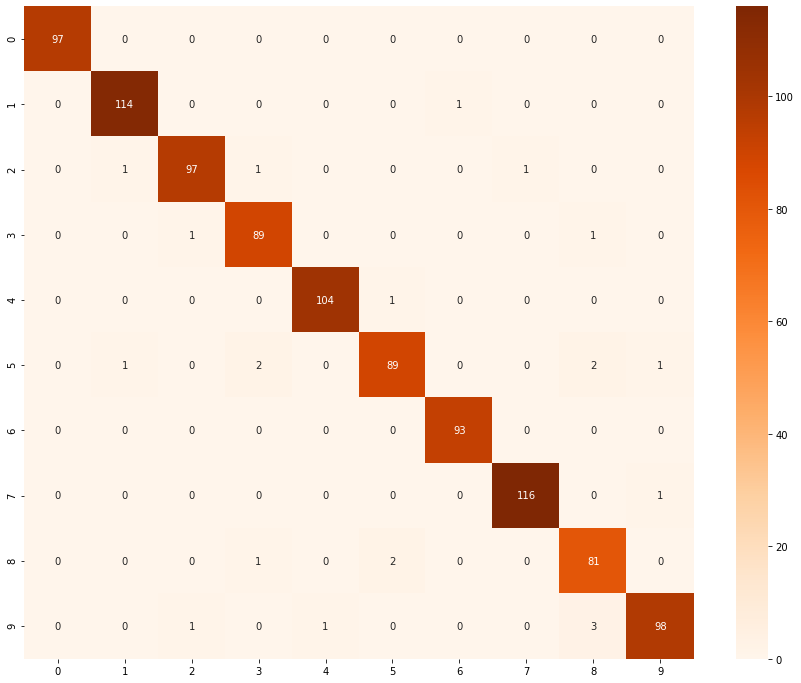

In [19]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(conf, 
            xticklabels=np.unique(ytrain),
            yticklabels=np.unique(ytrain),
            cmap='Oranges',
            annot=True,
            fmt='g'
           )

### 10. Other interesting analysis:
- We can see how much of an impact adding more components has on capturing the overall variance of the original data set.
- We can do this by transforming the data with another PCA model that captures the maximum number of components (which in our case is 784) and plotting the cumulative sum of the explained variance ratio.

In [20]:
m784 = PCA() 
#note that the default number of components is the original number of features, so we don't need to specify it explicitly
xt784 = m784.fit_transform(xsmall)

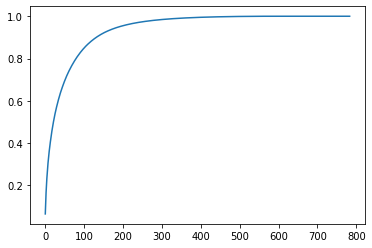

In [21]:
import numpy as np
ex_var = m784.explained_variance_ratio_
cumsum = np.array(ex_var).cumsum()
x=range(784)
plt.plot(x, cumsum)